**Chapter 06**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
%matplotlib inline

# 8
## 8(a)

In [106]:
x = np.random.normal(0,1,100)
epsilon = np.random.normal(0,1,100)

## 8(b)

In [107]:
beta_0 = 3
beta_1 = 2
beta_2 = -3
beta_3 = 0.3
y = beta_0 + beta_1 * x + beta_2 * x**2 + beta_3 * x**3 + epsilon

## 8(c)

In [86]:
data = pd.DataFrame({
    'y' : y,
    'x1' : x,
    'x2' : x**2,
    'x3' : x**3,
    'x4' : x**4,
    'x5' : x**5,
    'x6' : x**6,
    'x7' : x**7,
    'x8' : x**8,
    'x9' : x**9,
    'x10' : x**10
})
data.head()

,x1,x10,x2,x3,x4,x5,x6,x7,x8,x9,y
0,-0.344676,0.000024,0.118802,-0.040948,0.014114,-0.004865,0.001677,-0.000578,0.000199,-0.000069,2.769594
1,0.425319,0.000194,0.180896,0.076938,0.032723,0.013918,0.005920,0.002518,0.001071,0.000455,3.171655
2,-2.066980,1423.519415,4.272408,-8.830982,18.253467,-37.729556,77.986250,-161.196043,333.189047,-688.695199,-18.526179
3,0.561032,0.003089,0.314757,0.176588,0.099072,0.055582,0.031183,0.017495,0.009815,0.005507,4.092179
4,-0.350250,0.000028,0.122675,-0.042967,0.015049,-0.005271,0.001846,-0.000647,0.000226,-0.000079,2.738207


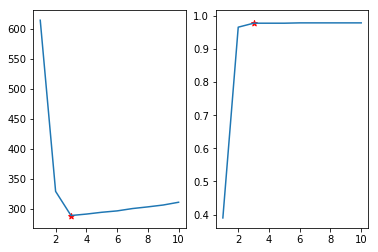

In [91]:
from statsmodels.formula.api import ols
import re
# use regularizaion rule to extact the bic and ajust r squared
def bic(text):
    pattern = r'BIC:\s+ [-+]?\d+[\.]?\d*[eE]?[-+]?\d*'
    group = re.search(pattern, text)[0]
    pattern = r'[\d\.]+'
    return float(re.search(pattern, group)[0])
def adjust_r_square(text):
    pattern = r'dj. R-squared:\s+ [-+]?\d+[\.]?\d*[eE]?[-+]?\d*'
    group = re.search(pattern, text)[0]
    pattern =r'[-+]?\d+[\.]?\d*[eE]?[-+]?\d*'
    return float(re.search(pattern, group)[0])
def ols_indexes(formula):
    model = ols(formula, data=data).fit()
    model_summary = model.summary()
    text = model_summary.as_text()
    return bic(text), adjust_r_square(text)
bics = []
ajust_r_square = []
formulas = ['y ~ x1','y ~ x1+x2', 'y ~ x1+x2+x3','y ~ x1+x2+x3+x4','y ~ x1+x2+x3+x4+x5',
            'y ~ x1+x2+x3+x4+x5+x6', 'y ~ x1+x2+x3+x4+x5+x6+x7',
            'y ~ x1+x2+x3+x4+x5+x6+x7+x8', 'y ~ x1+x2+x3+x4+x5+x6+x7+x8+x9',
           'y ~ x1+x2+x3+x4+x5+x6+x7+x8+x9+x10']
for formula in formulas:
    indexes = ols_indexes(formula)
    bics.append(indexes[0])
    ajust_r_square.append(indexes[1])
x = np.arange(1,11)
plt.subplot(1,2,1)
plt.plot(x, bics)
plt.scatter([x[2]],[bics[2]],marker='*',c='r')
plt.subplot(1,2,2)
plt.plot(x, ajust_r_square)
plt.scatter([x[2]],[ajust_r_square[2]],marker='*',c='r')
plt.show()

Above illustrating two images, we conclude that $y=\beta_0 + \beta_1x+\beta_2x^2+\beta_3x^3$ approach fits the response best.

## 8(d)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
X = data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']]
y = data['y']
esitmator = LinearRegression()
selector = RFE(esitmator, 3, step=1)
selector = selector.fit(X,y)
selector.support_

array([ True,  True,  True, False, False, False, False, False, False, False], dtype=bool)

From the RFE selector, we know that first three predictors are choen as the best preditors which is same with subsection above (c).

## 8(e)

/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


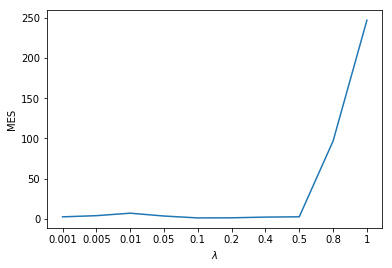

In [99]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
lambdas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
lambdas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2,0.4,0.5,0.8,1]
mse_scores = []
for lam in lambdas:
    clf = linear_model.Lasso(alpha=lam)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    residuals = y_test - pred
    mse_scores.append(np.sum(residuals**2)/residuals.shape[0])
x_coord = range(1, 11,1)
plt.plot(x_coord, mse_scores)
plt.xticks(x_coord, lambdas)
plt.xlabel(r'$\lambda$')
plt.ylabel('MES')
plt.show()

In [102]:
clf = linear_model.Lasso(alpha=0)
clf.fit(X_train, y_train)
print(clf.coef_)

[  2.30057358e+00  -3.89432316e+00  -2.16565352e-01   2.64380758e-01
   1.81831769e-01   2.34063146e-02  -5.95877584e-03  -2.52804106e-03
  -2.64961765e-03  -9.33027715e-04]


/Users/gaufung/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [103]:
print(clf.intercept_)

3.25192450212


## 8(f)

In [108]:
beta_7 = 8
y = beta_0 + beta_7 * x**7+epsilon

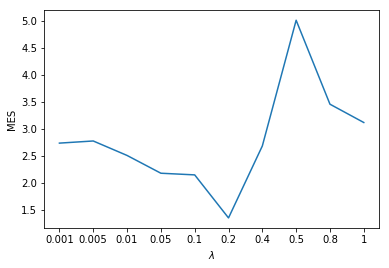

In [113]:
data = pd.DataFrame({
    'y':y,
    'x1' : x,
    'x2' : x**2,
    'x3' : x**3,
    'x4' : x**4,
    'x5' : x**5,
    'x6' : x**6,
    'x7' : x**7,
    'x8' : x**8,
    'x9' : x**9,
    'x10' : x**10
})
X = data[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
lambdas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2,0.4,0.5,0.8,1]
mse_scores = []
for lam in lambdas:
    clf = linear_model.Lasso(alpha=lam)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    residuals = y_test - pred
    mse_scores.append(np.sum(residuals**2)/residuals.shape[0])
x_coord = range(1, 11,1)
plt.plot(x_coord, mse_scores)
plt.xticks(x_coord, lambdas)
plt.xlabel(r'$\lambda$')
plt.ylabel('MES')
plt.show()

In [114]:
clf = linear_model.Lasso(alpha=0.2)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[-0.          0.         -4.67409123  1.63373437  7.92142919 -1.35760926
  4.17687551  0.08642549  0.56824255  0.05903364]
2.94685048917


# 9

In [115]:
college_file_path = '../data/College.csv'
colleges = pd.read_csv(college_file_path, index_col=0)
colleges.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## 9(a)

In [118]:
from sklearn.model_selection import train_test_split
colleges=colleges.replace(['Yes','No'],[1,-1])
colleges.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [119]:
colleges.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [121]:
X = colleges[['Private', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
              'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
              'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
              'Grad.Rate']].values
y = colleges['Apps'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

## 9(b)

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
residual = pred - y_test
print(np.sum(residual**2)/residual.shape[0])

1440756.65034


## 9(c)

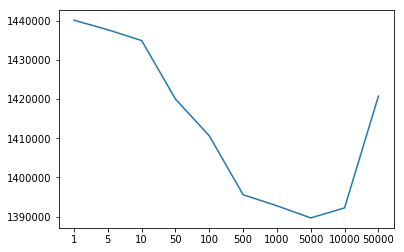

In [131]:
from sklearn import linear_model
alphas = [1, 5, 10,50,100,500,1000,5000,10000,50000]
mses = []
for alpha in alphas:
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    residual = reg.predict(X_test) - y_test
    mses.append(np.sum(residual*residual)/residual.shape[0])
x = range(1,11,1)
plt.plot(x, mses)
plt.xticks(x,alphas)
plt.show()

In [132]:
reg = linear_model.Ridge(alpha=5000)
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)

[ -9.92021819e+00   1.24910340e+00  -2.76348702e-01   4.38145767e+01
  -1.17827415e+01   1.12508238e-01   4.47224846e-02  -6.64293603e-02
   1.93821725e-01  -5.52349566e-02  -2.89435131e-02  -4.41754286e+00
  -5.17170590e+00   6.59267719e+00  -6.25867435e+00   7.26582050e-02
   1.01440765e+01] -982.061064919


## 9(d)

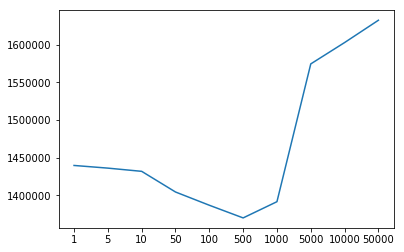

In [133]:
alphas = [1, 5, 10,50,100,500,1000,5000,10000,50000]
mses = []
for alpha in alphas:
    reg = linear_model.Lasso(alpha=alpha)
    reg.fit(X_train, y_train)
    residual = reg.predict(X_test) - y_test
    mses.append(np.sum(residual*residual)/residual.shape[0])
x = range(1,11,1)
plt.plot(x, mses)
plt.xticks(x,alphas)
plt.show()

In [134]:
reg = linear_model.Lasso(alpha=500)
reg.fit(X_train, y_train)
print(reg.coef_,reg.intercept_)

[ -0.00000000e+00   1.25962483e+00  -2.44959925e-01   3.81893082e+01
  -6.84297725e+00   1.02636531e-01   3.73884906e-02  -7.54237016e-02
   1.97375911e-01  -3.36698770e-02  -2.38436242e-02  -2.95636819e+00
  -3.55491103e+00   0.00000000e+00  -1.90595131e-01   6.92584659e-02
   6.10645693e+00] -1031.20569263


## 9(e)

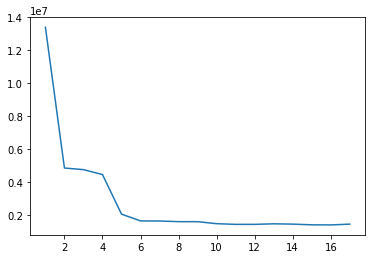

In [136]:
from sklearn.decomposition import PCA
Ms = range(1,18)
mses = []
for m in Ms:
    pca = PCA(n_components=m)
    pca.fit(X_train)
    X_train_trans = pca.transform(X_train)
    lr = LinearRegression()
    lr.fit(X_train_trans, y_train)
    X_test_trans = pca.transform(X_test)
    residual = lr.predict(X_test_trans) - y_test
    mses.append(np.sum(residual*residual)/residual.shape[0])
plt.plot(Ms, mses)
plt.show()

## 9(f)

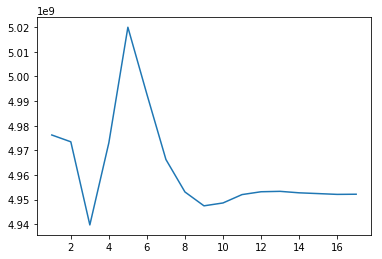

In [137]:
from sklearn.cross_decomposition import PLSRegression
Ms = range(1,18)
mses = []
for m in Ms:
    pls = PLSRegression(n_components=m)
    pls.fit(X_train, y_train)
    residual = pls.predict(X_test) - y_test
    mses.append(np.sum(residual*residual)/residual.shape[0])
plt.plot(Ms, mses)
plt.show()

# 10
## 10(a)

In [152]:
X = np.random.randint(1,high=200, size=(1000,20))
beta = np.random.randn(20,1)
beta[2] = 0.0
beta[3] = 0.0
beta[8] = 0.0
beta[18] = 0.0
beta[9] = 0.0
epsilon = np.random.normal(0,1,1000).reshape((1000,1))
y = X.dot(beta)+epsilon

## 10(b)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## 10(c)

/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


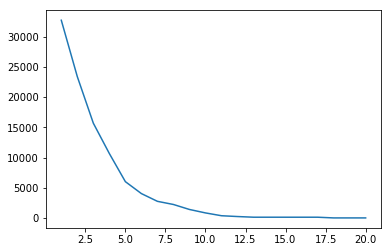

In [164]:
from sklearn.feature_selection import SelectKBest, f_regression
#X_new = SelectKBest(f_regression, k=2).fit_transform(X_train,y_train)
ms = range(1,21)
mses = []
for m in ms:
    selector = SelectKBest(f_regression, k=m)
    selector.fit(X_train,y_train)
    X_new = selector.transform(X_train)
    lr = LinearRegression()
    lr.fit(X_new, y_train)
    residual = lr.predict(X_new) - y_train
    mses.append(np.sum(residual*residual)/residual.shape[0])
plt.plot(ms, mses)
plt.show()

## 10(d)

/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


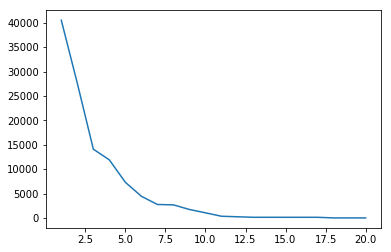

In [165]:
ms = range(1,21)
mses = []
for m in ms:
    selector = SelectKBest(f_regression, k=m)
    selector.fit(X_train,y_train)
    X_new = selector.transform(X_train)
    lr = LinearRegression()
    lr.fit(X_new, y_train)
    X_test_new = selector.transform(X_test)
    residual = lr.predict(X_test_new) - y_test
    mses.append(np.sum(residual*residual)/residual.shape[0])
plt.plot(ms, mses)
plt.show()

## 10(f)

In [166]:
print(mses)

[40513.537713952188, 27600.678196853009, 14093.901572414637, 11892.36682445843, 7297.487709617988, 4433.7833899441703, 2752.8550230134492, 2675.9504545136851, 1727.2656914288339, 1046.0674814643901, 341.49444662243178, 235.64687886519044, 131.36481395884778, 131.37397699313757, 128.25638497581457, 129.06162182711472, 129.17776928107406, 1.0532445874667618, 1.0636700530274779, 1.071326570875653]


when $m=18$, it has lowest test mse, that is 1.0532445.

# 11

In [2]:
boston_file_path = '../data/Boston.csv'
bostons = pd.read_csv(boston_file_path, index_col=0)
bostons.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 11(a)

In [3]:
bostons.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
X = bostons[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']].values
y = bostons['crim'].values

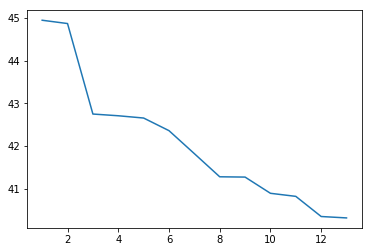

In [8]:
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression
# select best subsets
ms = range(1,14)
mses = []
for m in ms:
    selector = SelectKBest(f_regression, k=m)
    selector.fit(X,y)
    X_new = selector.transform(X)
    lr = LinearRegression()
    lr.fit(X_new, y)
    residual = lr.predict(X_new) - y
    mses.append(np.sum(residual*residual)/residual.shape[0])
plt.plot(ms, mses)
plt.show()

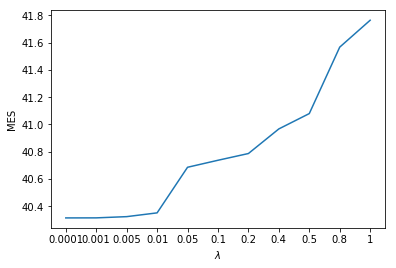

In [173]:
# Lasso
lambdas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2,0.4,0.5,0.8,1]
mse_scores = []
for lam in lambdas:
    clf = linear_model.Lasso(alpha=lam)
    clf.fit(X, y)
    pred = clf.predict(X)
    residuals = y - pred
    mse_scores.append(np.sum(residuals**2)/residuals.shape[0])
x_coord = range(1, 12,1)
plt.plot(x_coord, mse_scores)
plt.xticks(x_coord, lambdas)
plt.xlabel(r'$\lambda$')
plt.ylabel('MES')
plt.show()

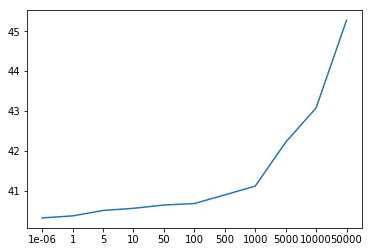

In [180]:
# Ridge
alphas = [0.000001,1, 5, 10,50,100,500,1000,5000,10000,50000]
mses = []
for alpha in alphas:
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X, y)
    residual = reg.predict(X) - y
    mses.append(np.sum(residual*residual)/residual.shape[0])
x = range(1,12,1)
plt.plot(x, mses)
plt.xticks(x,alphas)
plt.show()

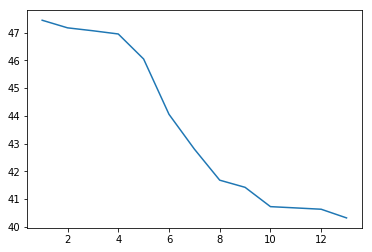

In [181]:
# PCR
from sklearn.decomposition import PCA
Ms = range(1,14)
mses = []
for m in Ms:
    pca = PCA(n_components=m)
    pca.fit(X)
    X_train_trans = pca.transform(X)
    lr = LinearRegression()
    lr.fit(X_train_trans, y)
    X_test_trans = pca.transform(X)
    residual = lr.predict(X_test_trans) - y
    mses.append(np.sum(residual*residual)/residual.shape[0])
plt.plot(Ms, mses)
plt.show()